In [7]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from optimized_routing.utils.backend_info import get_backend

In [6]:
noisy_fake_backend = get_backend()

## Example FullAdder circuit

In [16]:
qc = QuantumCircuit(5, 2)

# Full Adder logic
qc.cx(0, 3)         # A ⊕
qc.cx(1, 3)         # B ⊕ → sum = A⊕B⊕Cin
qc.ccx(0, 1, 4)     # A & B → carry
qc.cx(2, 3)         # Cin ⊕
qc.ccx(2, 3, 4)     # carry from Cin ⊕ sum

# Measure outputs
#qc.measure(3, 0)  # Sum
#qc.measure(4, 1)  # Carry out

# Rename circuit
FullAdder=qc

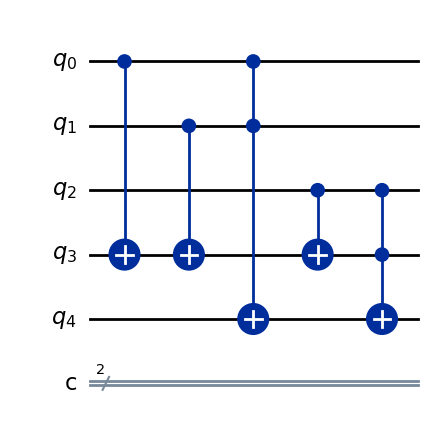

In [17]:
FullAdder.draw('mpl')

## Transpiled circuit

In [23]:
pm0 = generate_preset_pass_manager(backend=noisy_fake_backend, optimization_level=0)
pm1 = generate_preset_pass_manager(backend=noisy_fake_backend, optimization_level=1)
pm2 = generate_preset_pass_manager(backend=noisy_fake_backend, optimization_level=2)
pm3 = generate_preset_pass_manager(backend=noisy_fake_backend, optimization_level=3)

In [26]:
isa_circuit_l0 = pm0.run(FullAdder)
isa_circuit_l1 = pm1.run(FullAdder)
isa_circuit_l2 = pm2.run(FullAdder)
isa_circuit_l3 = pm3.run(FullAdder)

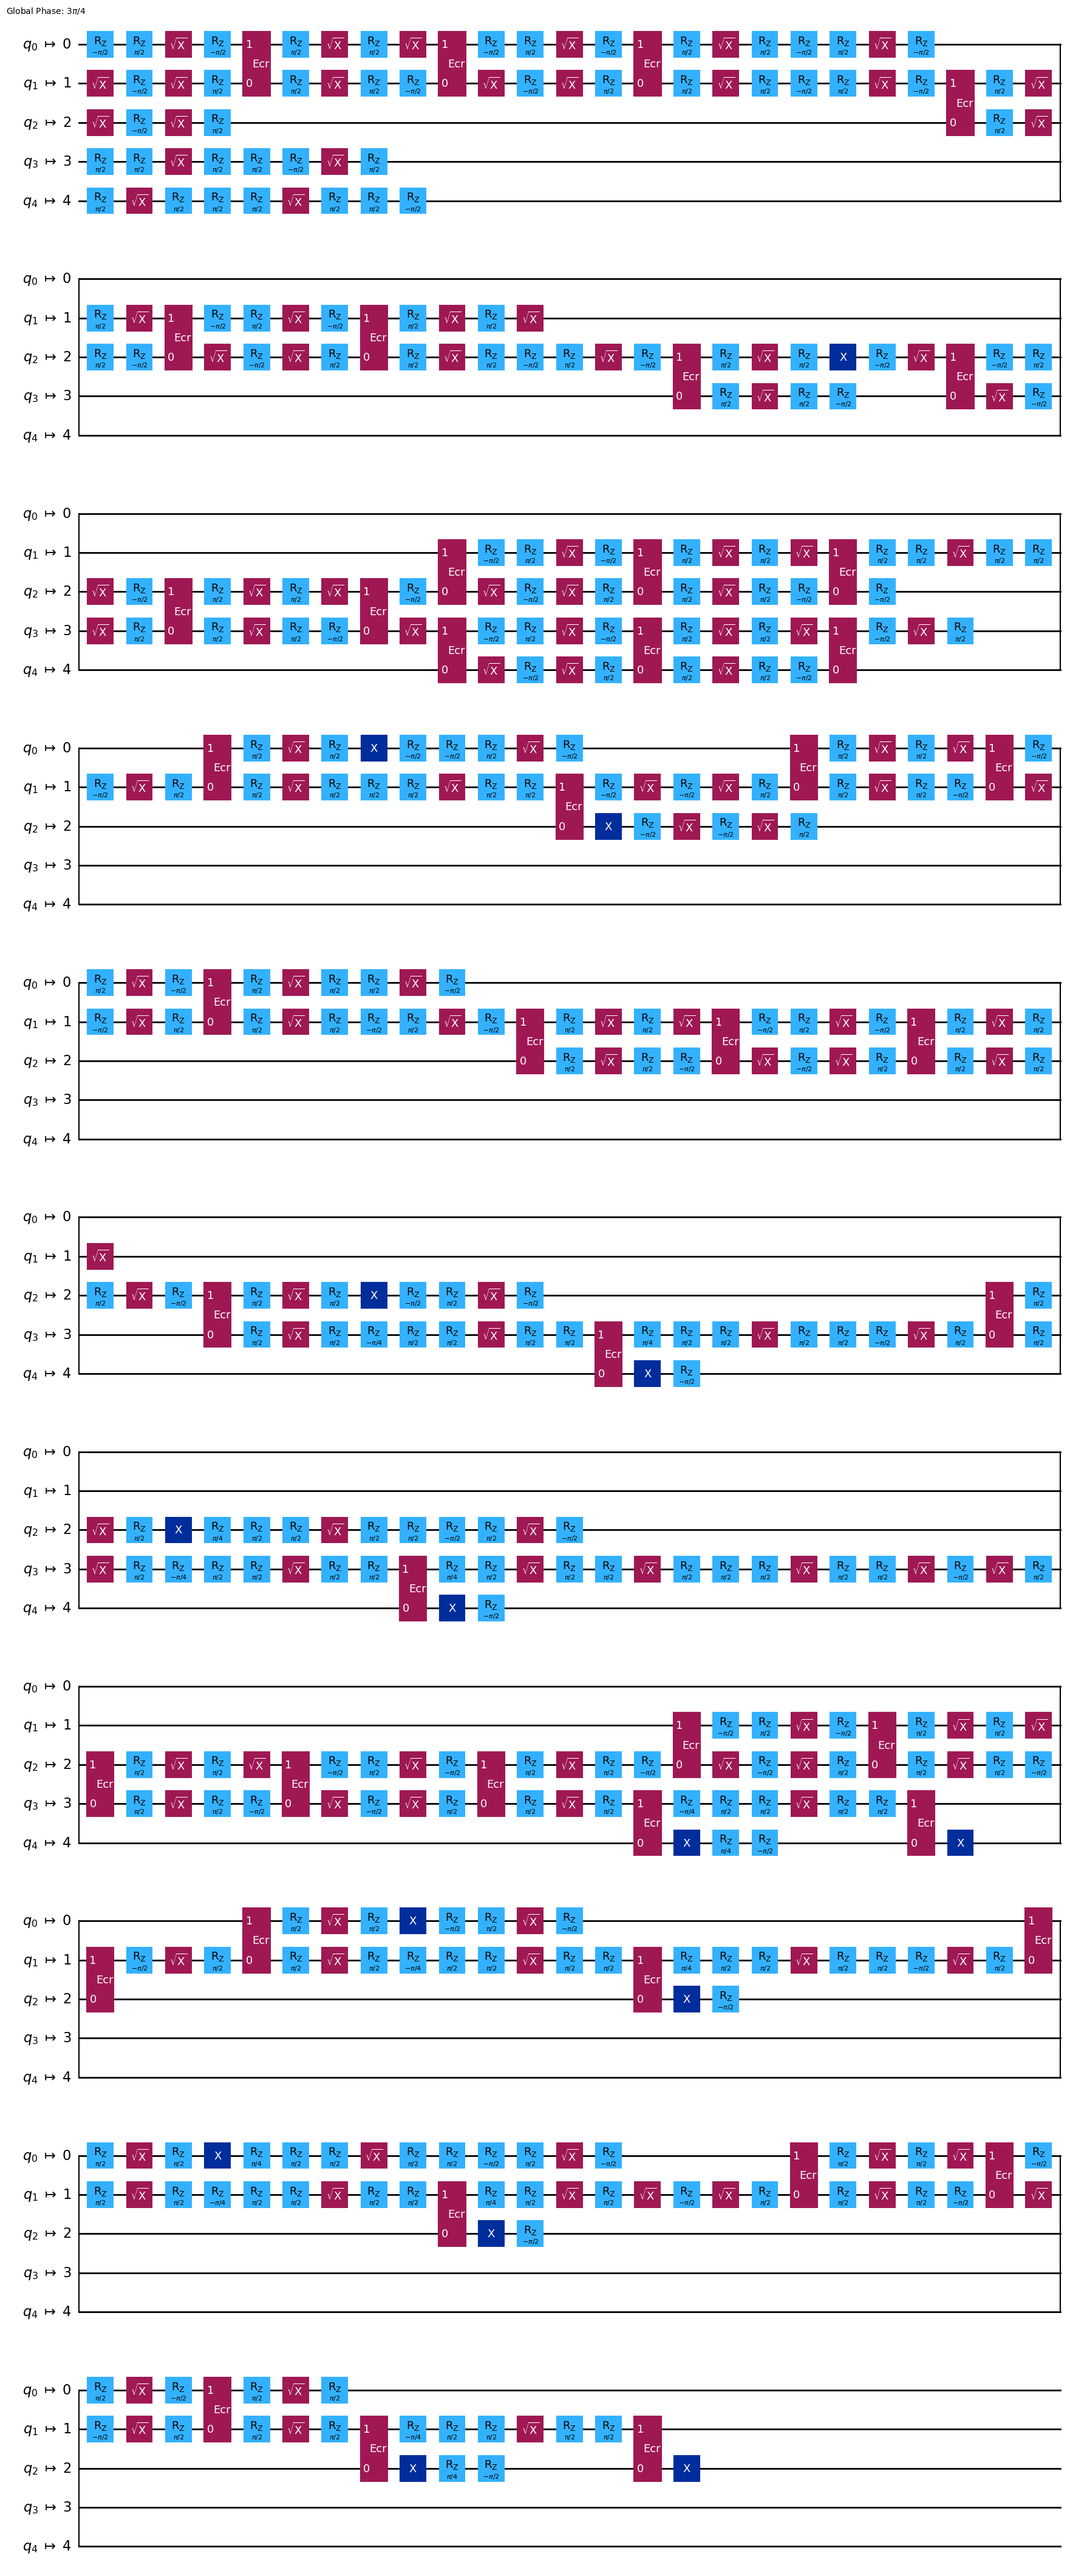

In [25]:
isa_circuit_l0.draw('mpl')

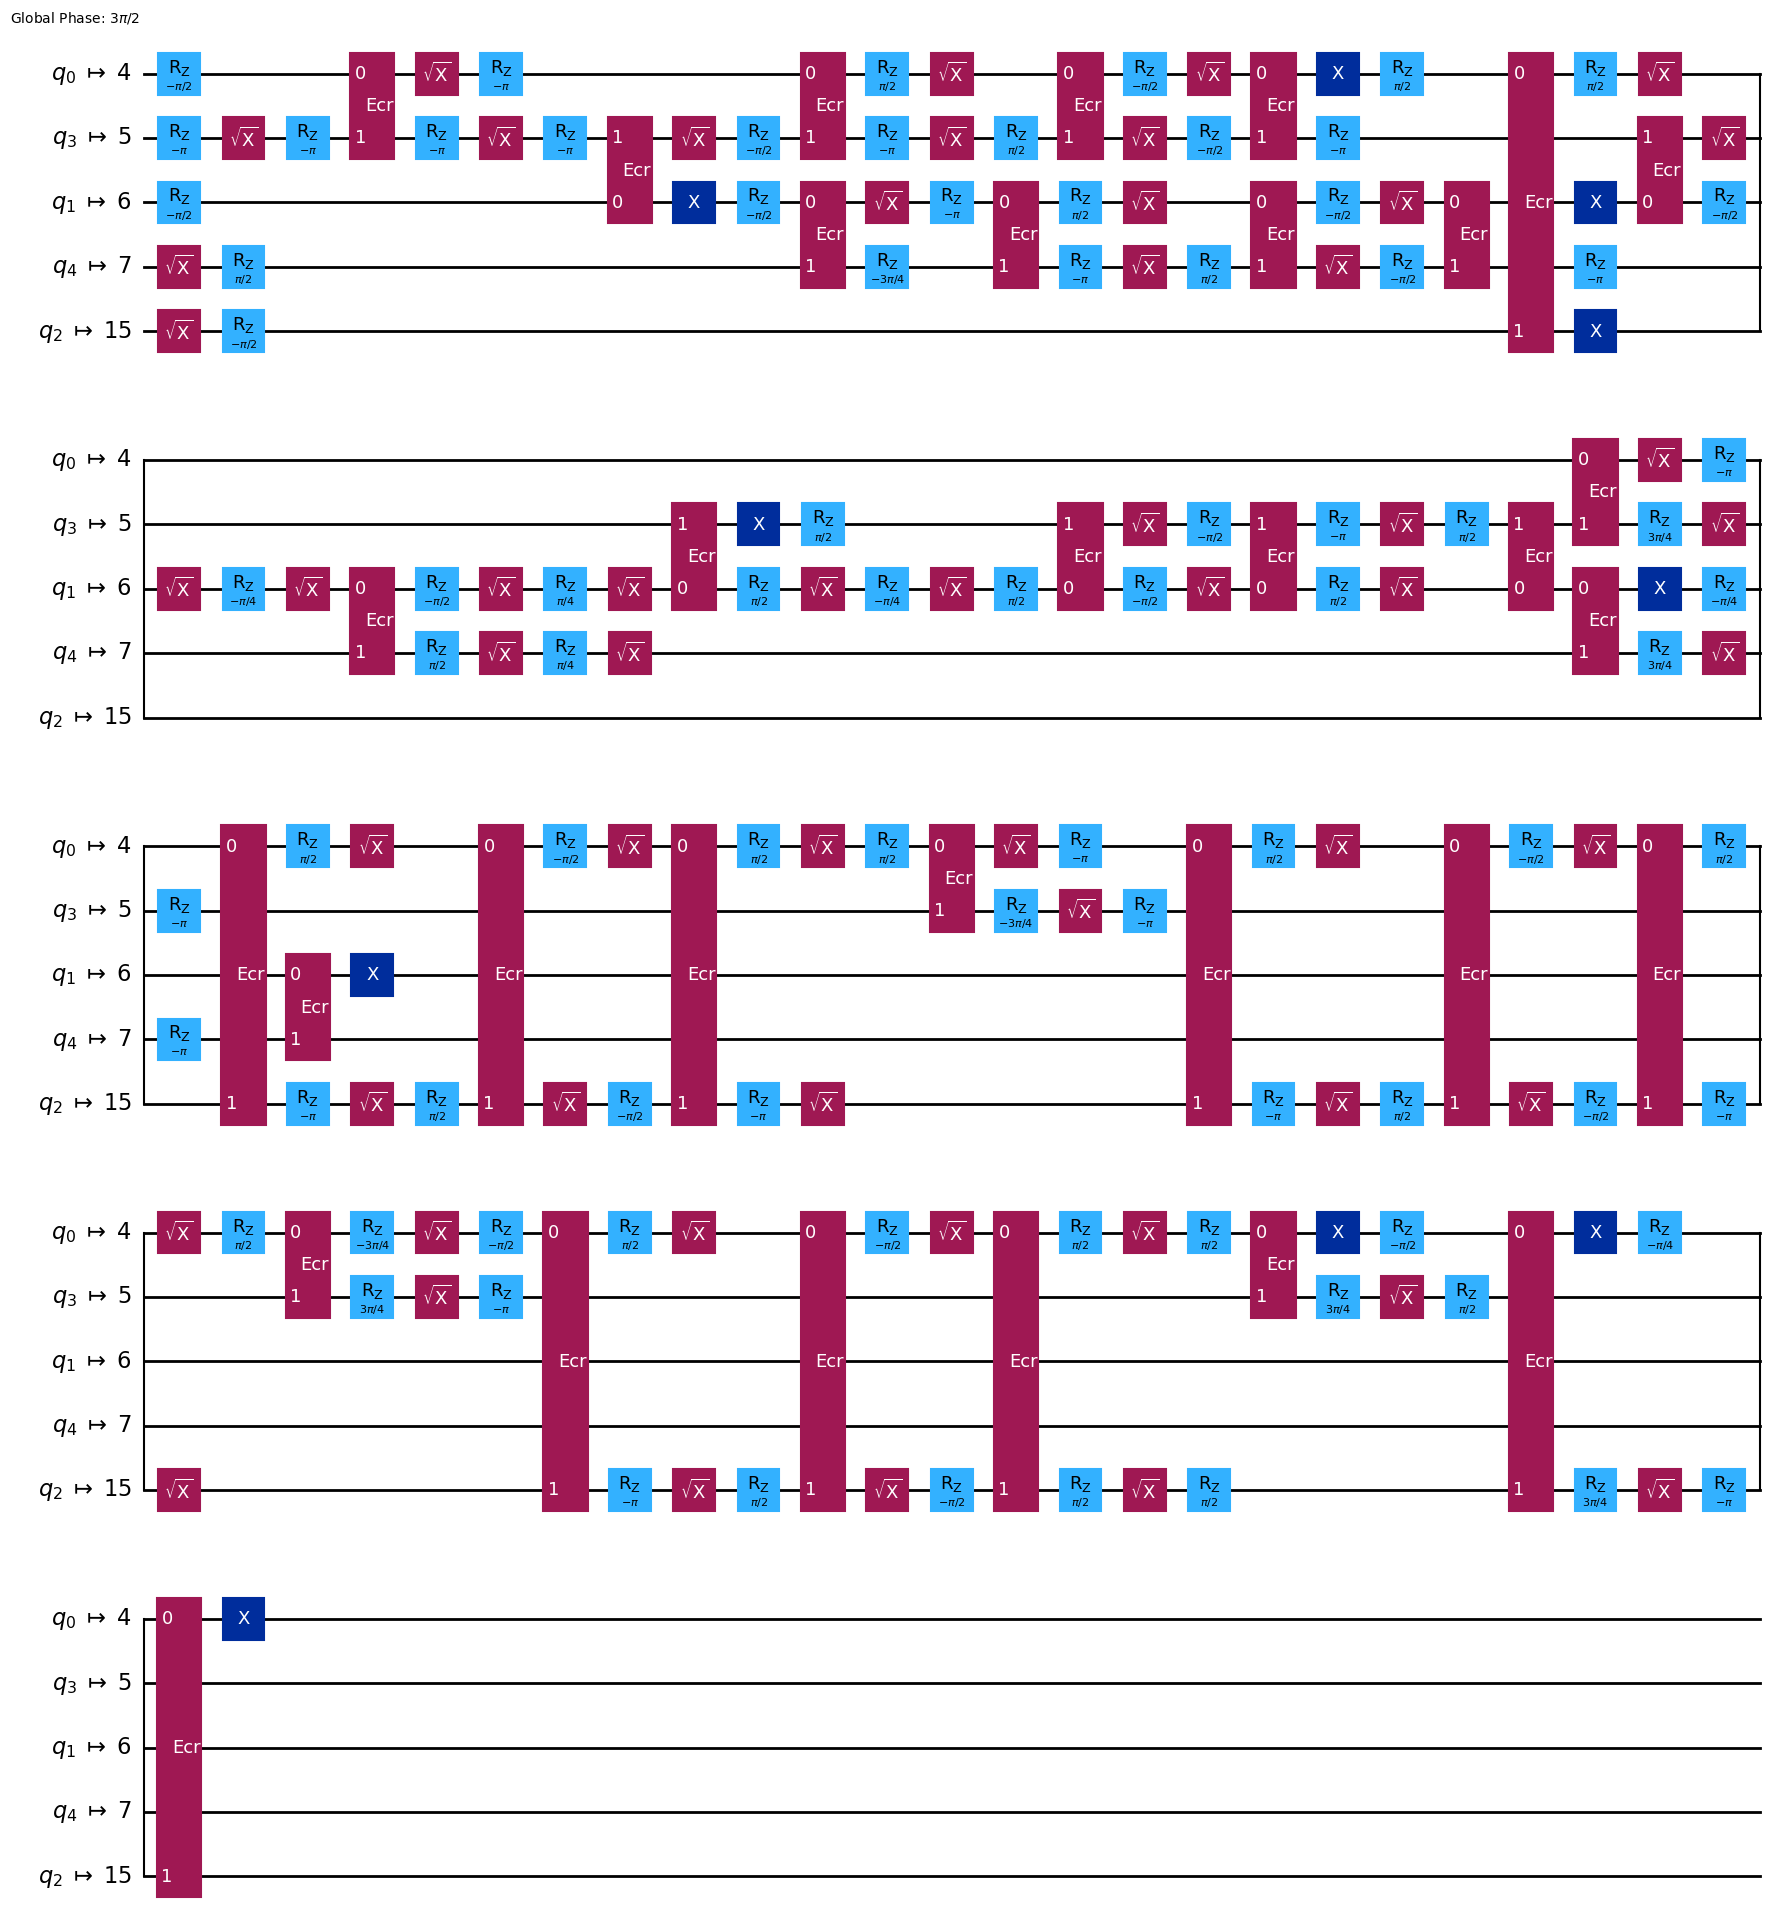

In [27]:
isa_circuit_l1.draw('mpl')

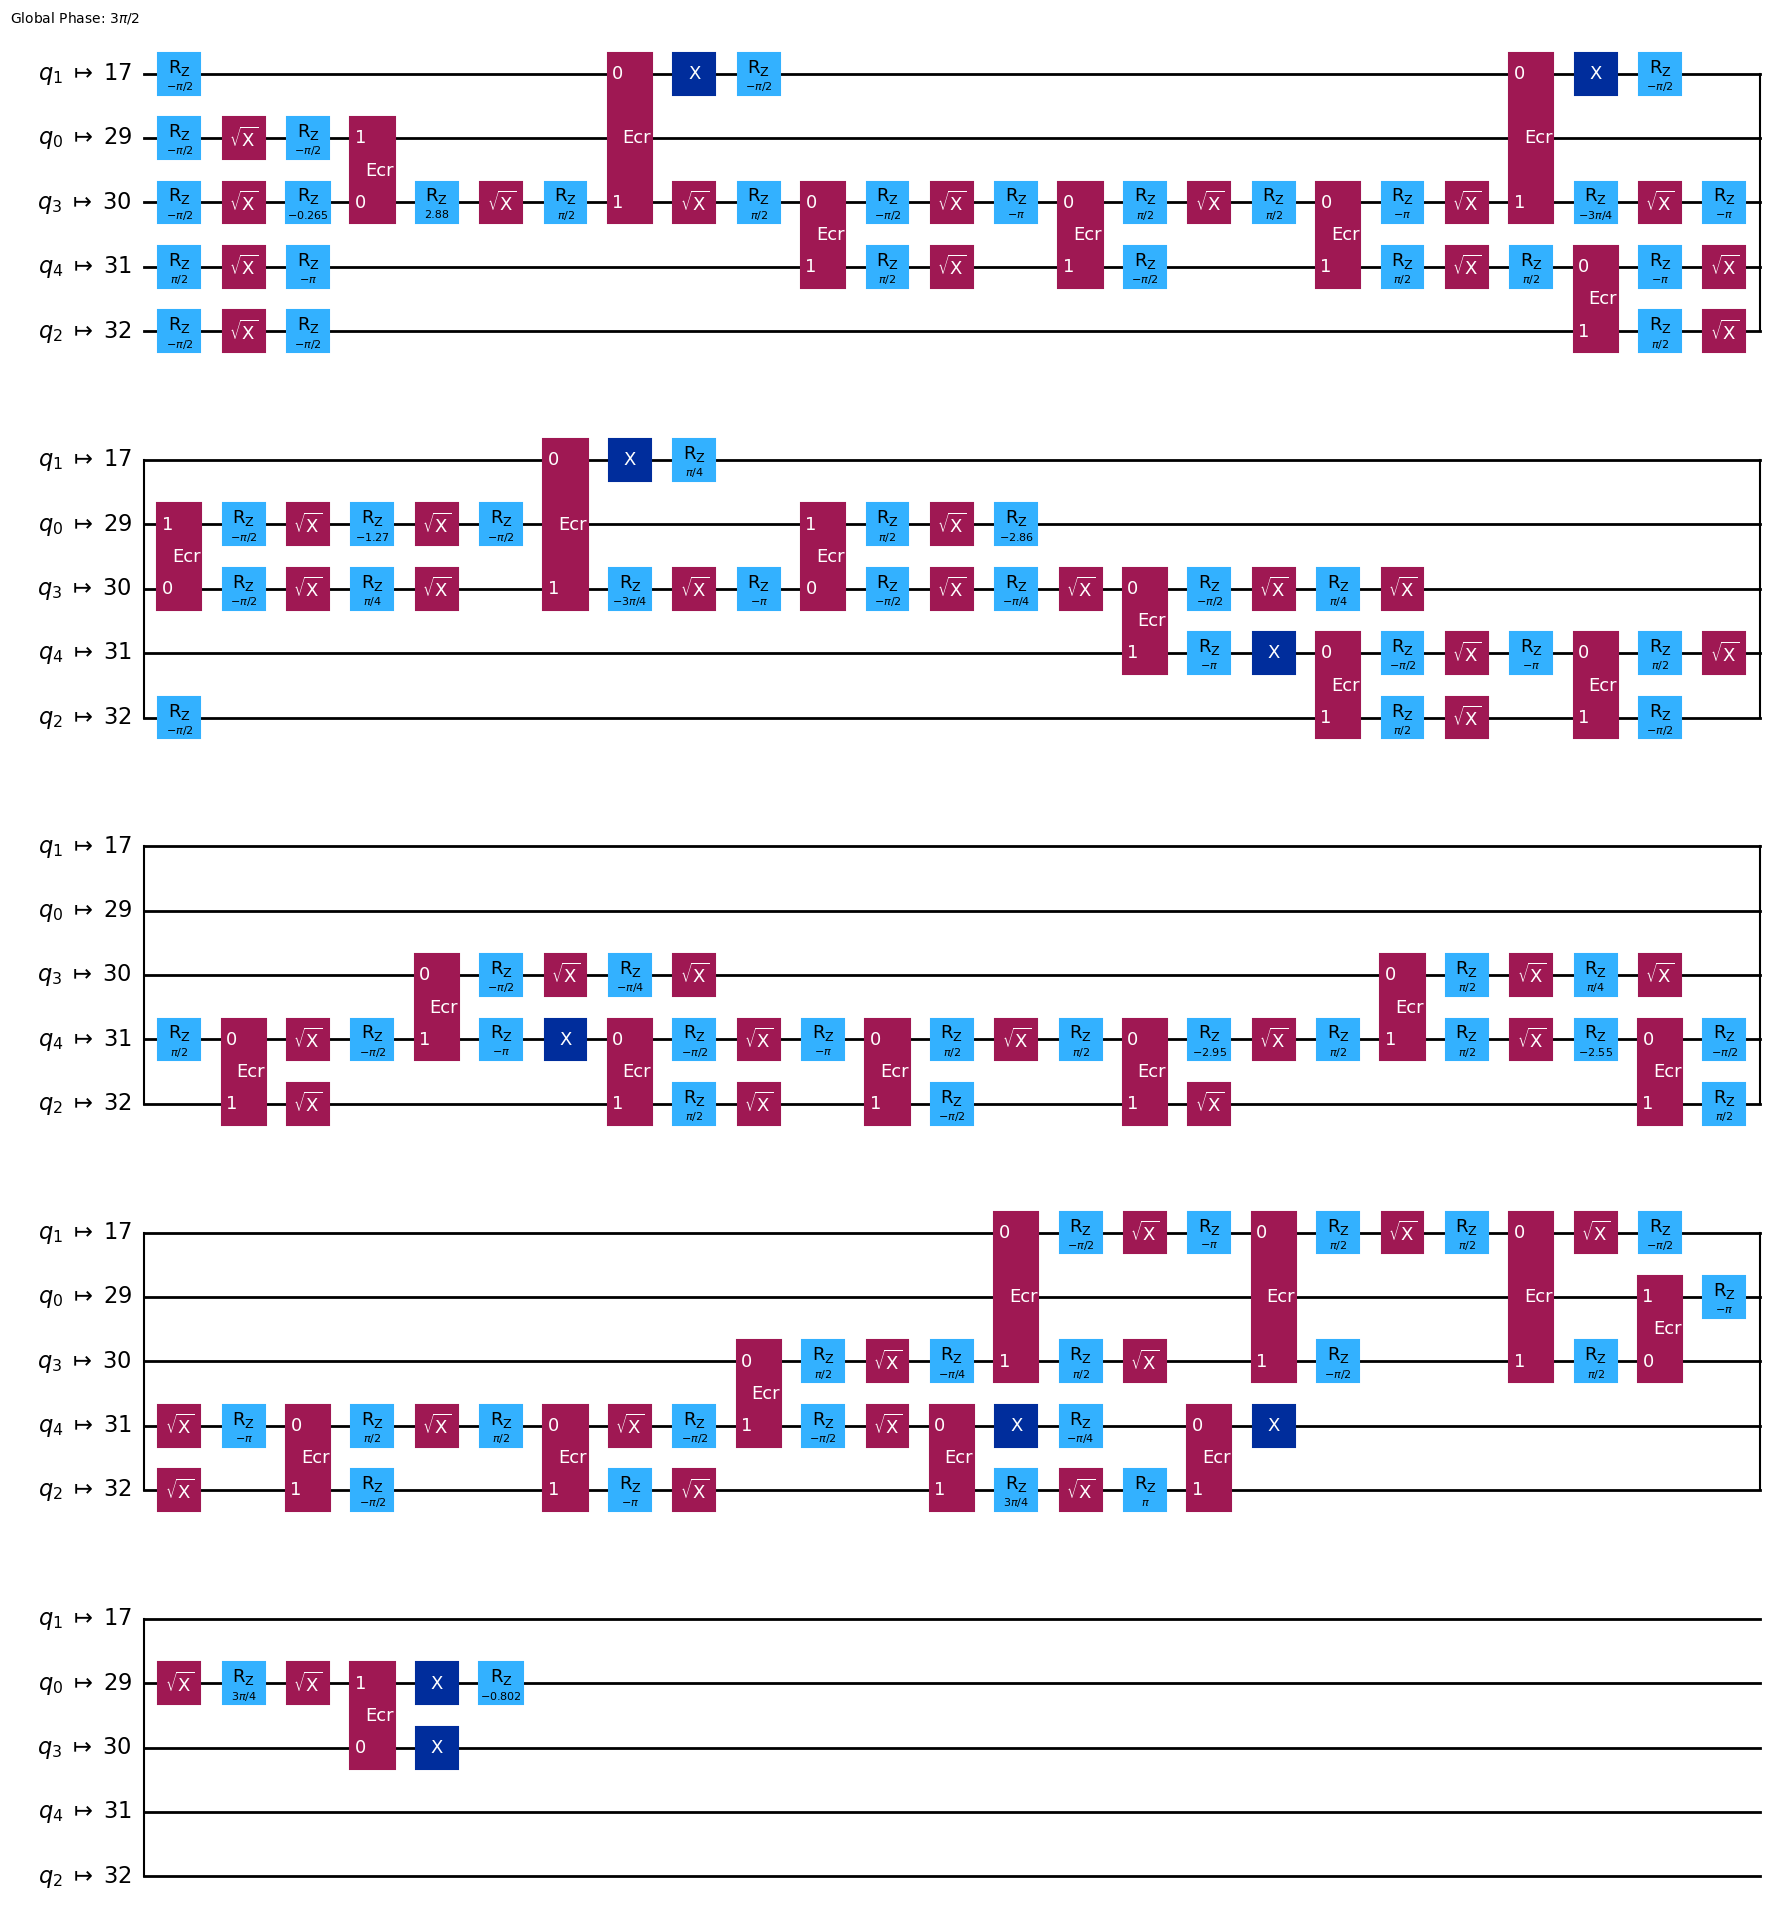

In [28]:
isa_circuit_l2.draw('mpl')

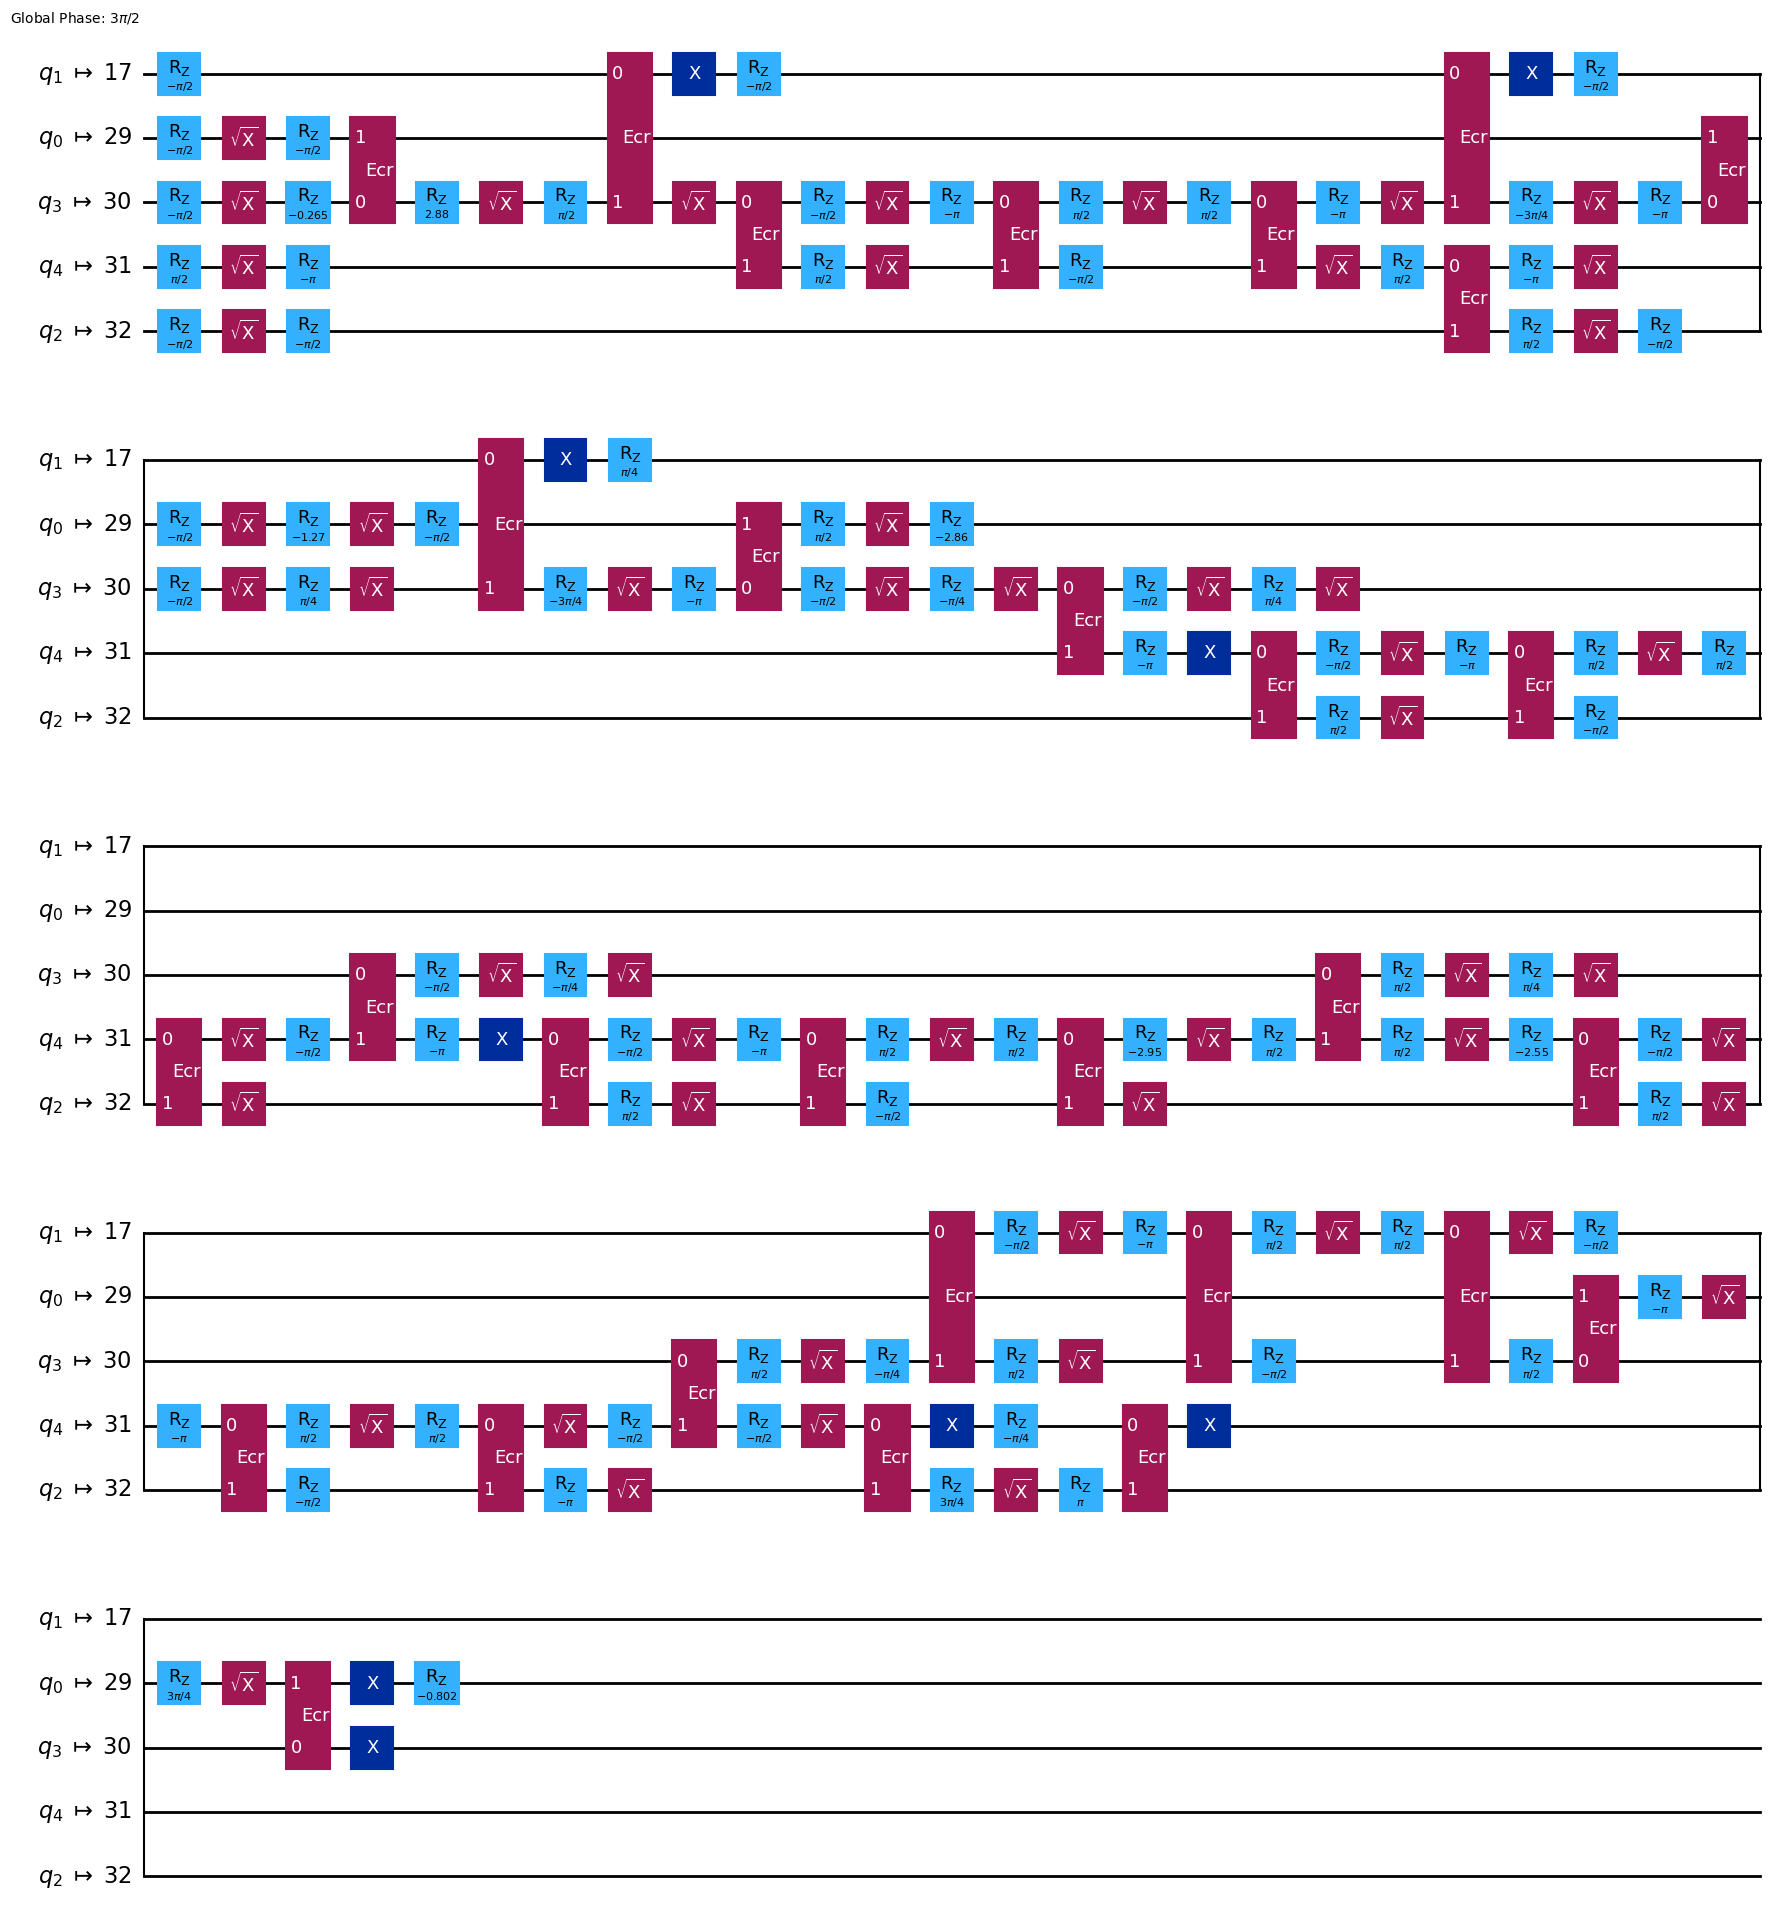

In [29]:
isa_circuit_l3.draw('mpl')

## Benchmarking the layouts

In [32]:
import time
import matplotlib.pyplot as plt

Optimization level: 0
Transpilation time (sec.): 0.007421016693115234
Circuit depth: 249
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 1
Transpilation time (sec.): 0.030585765838623047
Circuit depth: 98
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 2
Transpilation time (sec.): 0.016524076461791992
Circuit depth: 104
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 3
Transpilation time (sec.): 0.018942594528198242
Circuit depth: 104
------------------------------------------------------------------------------------------------------------------------------------------------------


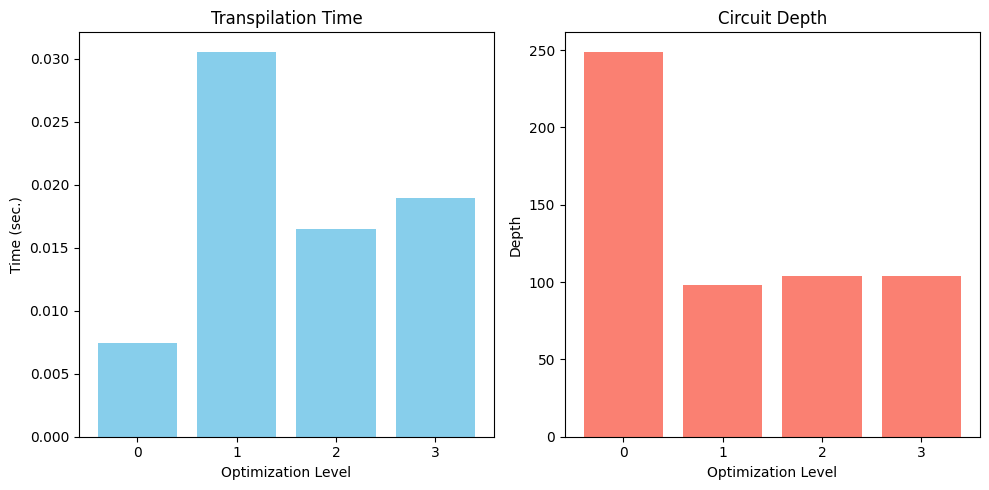

In [36]:
times = []
depths = []
### WRITE YOUR CODE HERE ###
# Sweep over different optimization levels
optimization_levels = [0,1,2,3]
for level in optimization_levels:
    pm = generate_preset_pass_manager(backend=noisy_fake_backend, optimization_level=level)
    ### YOUR CODE FINISHES HERE ###
    print('\033[1m' + f'Optimization level: {level}')
    start = time.time()
    isa_qc = pm.run(FullAdder)
    dt = time.time() - start
    times.append(dt)
    depth = isa_qc.depth()
    depths.append(depth)

    print('Transpilation time (sec.):', dt)
    print('Circuit depth:', depth)
    print('---' * 50)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar([str(lvl) for lvl in optimization_levels], times, color='skyblue')
plt.title('Transpilation Time')
plt.xlabel('Optimization Level')
plt.ylabel('Time (sec.)')

plt.subplot(1, 2, 2)
plt.bar([str(lvl) for lvl in optimization_levels], depths, color='salmon')
plt.title('Circuit Depth')
plt.xlabel('Optimization Level')
plt.ylabel('Depth')

plt.tight_layout()
plt.show()


Layout method: trivial
Transpilation time (sec.): 0.011493444442749023
Circuit depth: 159
------------------------------------------------------------------------------------------------------------------------------------------------------
Layout method: sabre
Transpilation time (sec.): 0.014649391174316406
Circuit depth: 97
------------------------------------------------------------------------------------------------------------------------------------------------------
Layout method: dense
Transpilation time (sec.): 0.013359308242797852
Circuit depth: 166
------------------------------------------------------------------------------------------------------------------------------------------------------
Layout method: default
Transpilation time (sec.): 0.014306068420410156
Circuit depth: 95
------------------------------------------------------------------------------------------------------------------------------------------------------

Best layout method: default with smallest

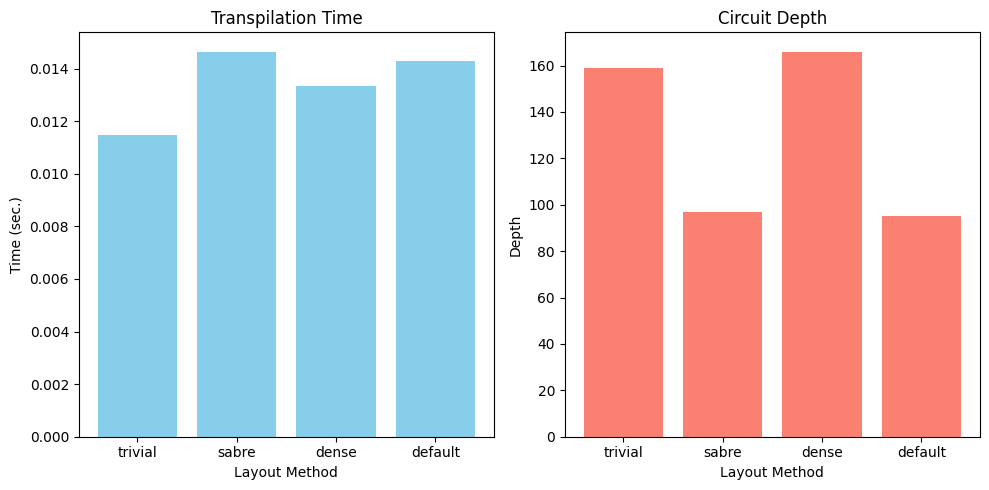

In [37]:
times = []
depths = []
# Sweep over layout methods
### WRITE YOUR CODE HERE ###
layout_methods = ['trivial', 'sabre', 'dense', 'default']
for layout_method in layout_methods:
    pm = generate_preset_pass_manager(backend=noisy_fake_backend, layout_method=layout_method)
    ### YOUR CODE FINISHES HERE
    print('\033[1m' + f'Layout method: {layout_method}')
    start = time.time()
    isa_qc = pm.run(FullAdder)
    dt = time.time() - start
    times.append(dt)
    depth = isa_qc.depth()
    depths.append(depth)

    print('Transpilation time (sec.):', dt)
    print('Circuit depth:', depth)
    print('---' * 50)

# Identify the layout method with the smallest depth
min_depth_index = depths.index(min(depths))
best_layout = layout_methods[min_depth_index]
min_depth = depths[min_depth_index]

print(f"\nBest layout method: {best_layout} with smallest circuit depth of {min_depth}.")

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(layout_methods, times, color='skyblue')
plt.title('Transpilation Time')
plt.xlabel('Layout Method')
plt.ylabel('Time (sec.)')

plt.subplot(1, 2, 2)
plt.bar(layout_methods, depths, color='salmon')
plt.title('Circuit Depth')
plt.xlabel('Layout Method')
plt.ylabel('Depth')

plt.tight_layout()
plt.show()


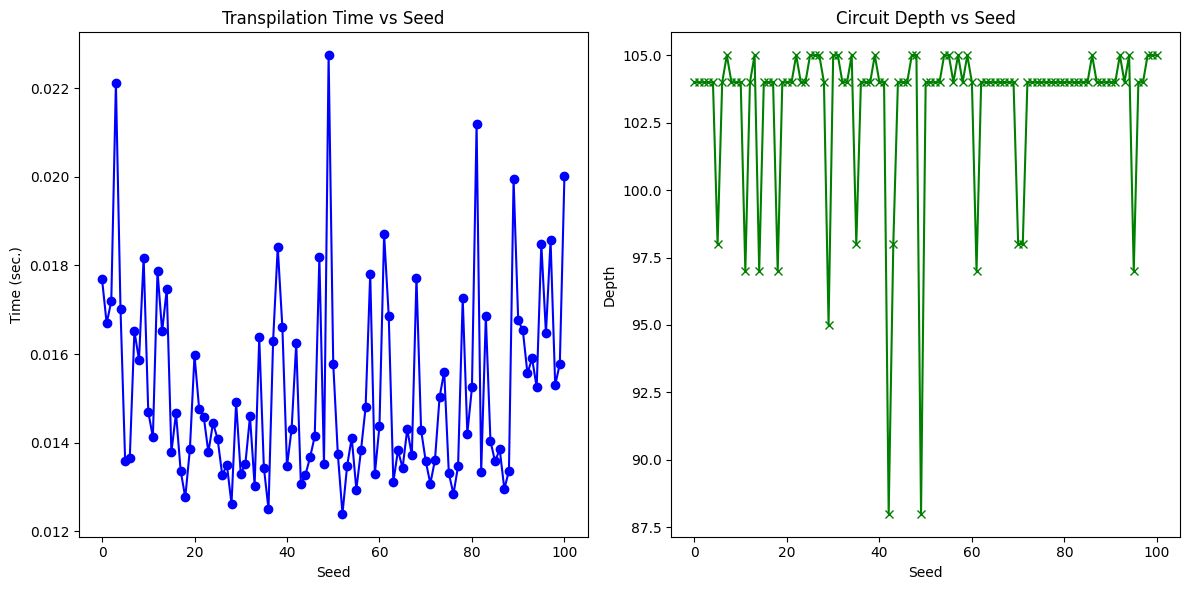

In [39]:
times = []
depths = []
### WRITE YOUR CODE HERE ###
# Sweep over seed_transpiler values
seed_values = [i for i in range(101)]
for seed in seed_values:
    pm = generate_preset_pass_manager(backend=noisy_fake_backend, optimization_level=2, seed_transpiler=seed)
    ### YOUR CODE FINISHES HERE
    start = time.time()
    isa_qc = pm.run(FullAdder)
    dt = time.time() - start
    times.append(dt)
    depths.append(isa_qc.depth())

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(seed_values, times, marker='o', linestyle='-', color='blue')
plt.title('Transpilation Time vs Seed')
plt.xlabel('Seed')
plt.ylabel('Time (sec.)')

plt.subplot(1, 2, 2)
plt.plot(seed_values, depths, marker='x', linestyle='-', color='green')
plt.title('Circuit Depth vs Seed')
plt.xlabel('Seed')
plt.ylabel('Depth')

plt.tight_layout()
plt.show()
